Version 3: Dollar Cost Averaging

---

- Investment Strategy: dollar-cost-averaging, or buying into the market on a regular basis, regardless of fluctuations.<br>
- Methodology: Simulate a dollar-cost-average strategy by investing $25 each Tuesday.  I decided on Tuesday to avoid the markets being closed on some Monday holidays.  I am also assuming the daily average daily price as the purchase price.<br>
- Follow-up Question:  After getting started with this strategy, is there ever a time when my invested dollars are greater than the value of my investments?  In other words:  are there periods of time where I am siting on a loss?  See graph for information.

In [59]:
#Loading libraries

import yfinance as yf 
import pandas as pd
import openpyxl
import datetime as dt
import matplotlib.pyplot as plt

# AI description of the libraries
# `yfinance`: This is a popular open-source library that allows you to access the financial data available on Yahoo Finance. You can download historical market data, get real-time data, and more.
# `pandas`: This is a powerful data manipulation library in Python. It provides data structures and functions needed to manipulate structured data, including functions for reading and writing data in a variety of formats.
# `openpyxl`: This is a Python library for reading and writing Excel 2010 xlsx/xlsm/xltx/xltm files. It is used when you want to work with Excel files (.xlsx, .xlsm) in Python.
# `datetime`: This is a module in Python's standard library for working with dates and times. It provides classes for manipulating dates and times in both simple and complex ways.

I am using two low cost ETFs for this analysis.<br>
- SPLG is a low cost ETF that tracks the S&P 500 index.
- XLG is a low cost, ETF that tracks the 50 largest companies in the S&P 500 index.

Methodology:<br>
1. Download 10 years of SPLG data.<br>
2. Implement the methodology.<br>
3. Check the results.<br>

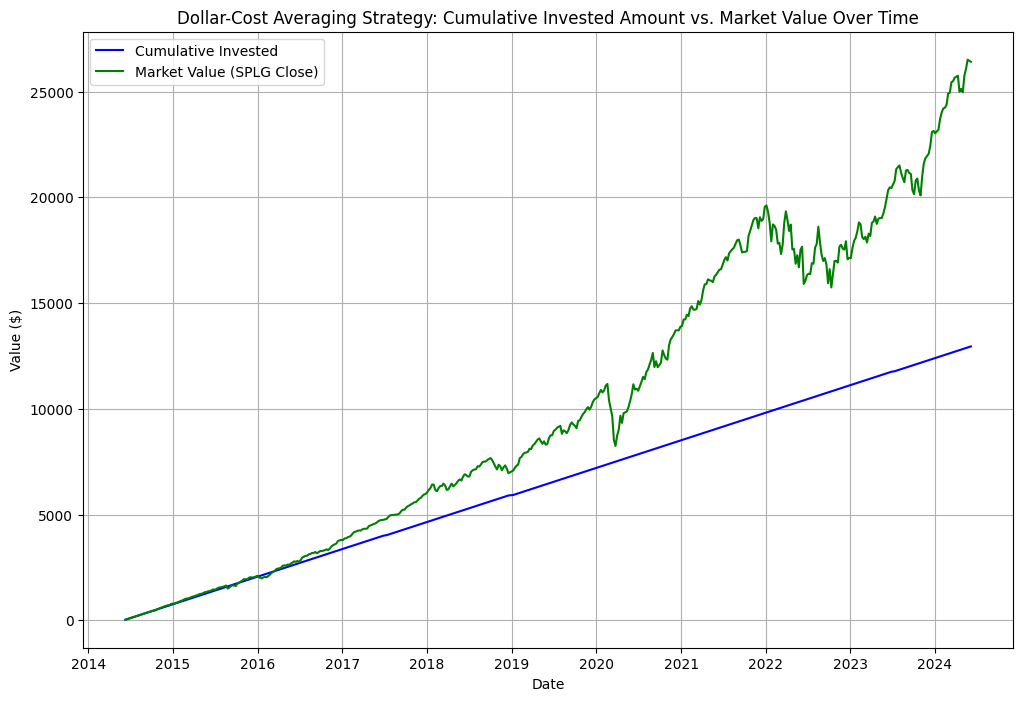

In [60]:
# Download 10 years of SPLG stock data
ticker = yf.Ticker("SPLG")
data = ticker.history(period="10y", interval="1d")
df = pd.DataFrame(data)
df.drop(['Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
df.insert(0, 'Date_add', df.index)
df.insert(1, 'Symbol', 'SPLG')
df.to_csv('yf_splg.csv', index=False)


# Load historical data
df = pd.read_csv('yf_splg.csv', parse_dates=['Date_add'])
df.rename(columns={'Date_add': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.tz_convert(None)

# Filter for Tuesdays
df['Day of Week'] = df['Date'].dt.day_name()
tuesdays_df = df[df['Day of Week'] == 'Tuesday'].copy()

# Calculate daily average price
tuesdays_df.loc[:, 'Avg Price'] = (tuesdays_df['Open'] + tuesdays_df['Close']) / 2

# Simulate DCA purchases
investment_amount = 25
tuesdays_df.loc[:, 'Shares Purchased'] = investment_amount / tuesdays_df['Avg Price']
tuesdays_df.loc[:, 'Cumulative Shares'] = tuesdays_df['Shares Purchased'].cumsum()

# Calculate the market value of the cumulative shares
tuesdays_df.loc[:, 'Market Value'] = tuesdays_df['Cumulative Shares'] * tuesdays_df['Close']

# Calculate the cumulative invested amount (correcting the calculation)
tuesdays_df.loc[:, 'Cumulative Invested'] = investment_amount * (tuesdays_df.reset_index().index + 1)

# Add debugging information
#print(tuesdays_df[['Date', 'Avg Price', 'Shares Purchased', 'Cumulative Shares', 'Market Value', 'Cumulative Invested']].head(10))

# Plot the DCA strategy results
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(tuesdays_df['Date'], tuesdays_df['Cumulative Invested'], label='Cumulative Invested', color='blue')
ax.plot(tuesdays_df['Date'], tuesdays_df['Market Value'], label='Market Value (SPLG Close)', color='green')
ax.set_title('Dollar-Cost Averaging Strategy: Cumulative Invested Amount vs. Market Value Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Value ($)')
ax.legend()
ax.grid(True)

plt.show()

# Display the final few rows of the DataFrame for inspection
#tuesdays_df.tail()


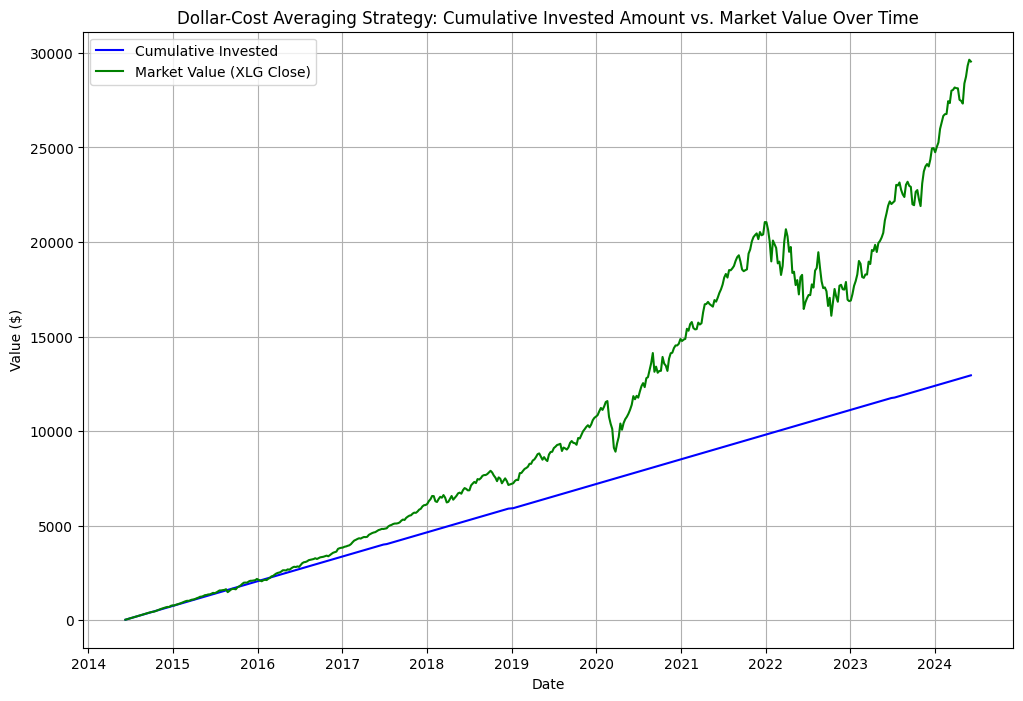

In [61]:
# Download 10 years of XLG stock data
ticker = yf.Ticker("XLG")
data = ticker.history(period="10y", interval="1d")
df = pd.DataFrame(data)
df.drop(['Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
df.insert(0, 'Date_add', df.index)
df.insert(1, 'Symbol', 'XLG')
df.to_csv('yf_xlg.csv', index=False)


# Load historical data
df = pd.read_csv('yf_xlg.csv', parse_dates=['Date_add'])
df.rename(columns={'Date_add': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.tz_convert(None)

# Filter for Tuesdays
df['Day of Week'] = df['Date'].dt.day_name()
tuesdays_df = df[df['Day of Week'] == 'Tuesday'].copy()

# Calculate daily average price
tuesdays_df.loc[:, 'Avg Price'] = (tuesdays_df['Open'] + tuesdays_df['Close']) / 2

# Simulate DCA purchases
investment_amount = 25
tuesdays_df.loc[:, 'Shares Purchased'] = investment_amount / tuesdays_df['Avg Price']
tuesdays_df.loc[:, 'Cumulative Shares'] = tuesdays_df['Shares Purchased'].cumsum()

# Calculate the market value of the cumulative shares
tuesdays_df.loc[:, 'Market Value'] = tuesdays_df['Cumulative Shares'] * tuesdays_df['Close']

# Calculate the cumulative invested amount (correcting the calculation)
tuesdays_df.loc[:, 'Cumulative Invested'] = investment_amount * (tuesdays_df.reset_index().index + 1)

# Add debugging information
#print(tuesdays_df[['Date', 'Avg Price', 'Shares Purchased', 'Cumulative Shares', 'Market Value', 'Cumulative Invested']].head(10))

# Plot the DCA strategy results
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(tuesdays_df['Date'], tuesdays_df['Cumulative Invested'], label='Cumulative Invested', color='blue')
ax.plot(tuesdays_df['Date'], tuesdays_df['Market Value'], label='Market Value (XLG Close)', color='green')
ax.set_title('Dollar-Cost Averaging Strategy: Cumulative Invested Amount vs. Market Value Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Value ($)')
ax.legend()
ax.grid(True)

plt.show()

# Display the final few rows of the DataFrame for inspection
#tuesdays_df.tail()


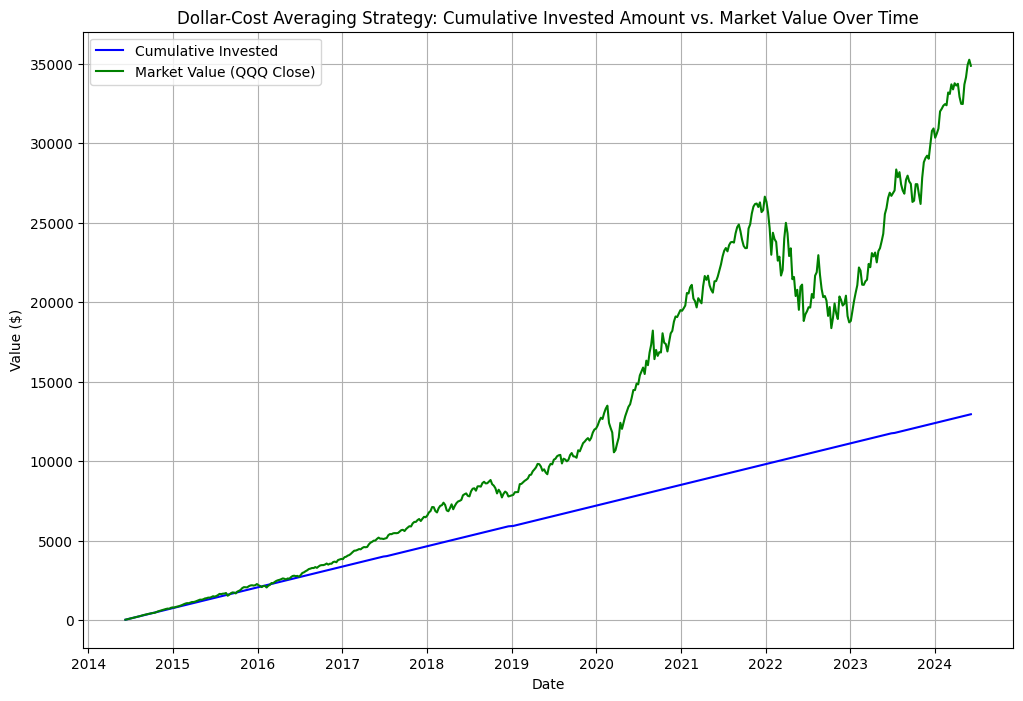

In [62]:
# Download 10 years of QQQ stock data
ticker = yf.Ticker("QQQ")
data = ticker.history(period="10y", interval="1d")
df = pd.DataFrame(data)
df.drop(['Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
df.insert(0, 'Date_add', df.index)
df.insert(1, 'Symbol', 'XLG')
df.to_csv('yf_qqq.csv', index=False)


# Load historical data
df = pd.read_csv('yf_qqq.csv', parse_dates=['Date_add'])
df.rename(columns={'Date_add': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.tz_convert(None)

# Filter for Tuesdays
df['Day of Week'] = df['Date'].dt.day_name()
tuesdays_df = df[df['Day of Week'] == 'Tuesday'].copy()

# Calculate daily average price
tuesdays_df.loc[:, 'Avg Price'] = (tuesdays_df['Open'] + tuesdays_df['Close']) / 2

# Simulate DCA purchases
investment_amount = 25
tuesdays_df.loc[:, 'Shares Purchased'] = investment_amount / tuesdays_df['Avg Price']
tuesdays_df.loc[:, 'Cumulative Shares'] = tuesdays_df['Shares Purchased'].cumsum()

# Calculate the market value of the cumulative shares
tuesdays_df.loc[:, 'Market Value'] = tuesdays_df['Cumulative Shares'] * tuesdays_df['Close']

# Calculate the cumulative invested amount (correcting the calculation)
tuesdays_df.loc[:, 'Cumulative Invested'] = investment_amount * (tuesdays_df.reset_index().index + 1)

# Add debugging information
#print(tuesdays_df[['Date', 'Avg Price', 'Shares Purchased', 'Cumulative Shares', 'Market Value', 'Cumulative Invested']].head(10))

# Plot the DCA strategy results
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(tuesdays_df['Date'], tuesdays_df['Cumulative Invested'], label='Cumulative Invested', color='blue')
ax.plot(tuesdays_df['Date'], tuesdays_df['Market Value'], label='Market Value (QQQ Close)', color='green')
ax.set_title('Dollar-Cost Averaging Strategy: Cumulative Invested Amount vs. Market Value Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Value ($)')
ax.legend()
ax.grid(True)

plt.show()

# Display the final few rows of the DataFrame for inspection
#tuesdays_df.tail(10)
